#Семинар №5

Исключения. Функциональный стиль в Python (на примере map()). Lambda. Итераторы и генераторы. Обзор стандартной библиотеки Python 3 и часто используемых сторонних модулей. Регулярные выражения.

##Обработка ошибок и исключений

При программировании на Python мы можем столкнуться с двумя типами ошибок. Первый тип представляют синтаксические ошибки (syntax error). Они появляются в результате нарушения синтаксиса языка программирования при написании исходного кода. При наличии таких ошибок программа не может быть скомпилирована. При работе в какой-либо среде разработки, например, в PyCharm, IDE сама может отслеживать синтаксические ошибки и каким-либо образом их выделять.

Второй тип ошибок представляют ошибки выполнения (runtime error). Они появляются в уже скомпилированной программе в процессе ее выполнения. Подобные ошибки еще называются исключениями. Например, в прошлых темах мы рассматривали преобразование строки в число:

In [ ]:
string = "5"
number = int(string)
print(number)

5


Данный скрипт успешно скомпилируется и выполнится, так как строка "5" вполне может быть конвертирована в число. Однако возьмем другой пример:

In [ ]:
string = "hello"
number = int(string)
print(number)

ValueError: ignored

При выполнении этого скрипта будет выброшено исключение ValueError, так как строку "hello" нельзя преобразовать в число:

In [ ]:
	ValueError: invalid literal for int() with base 10: 'hello'

С одной стороны, здесь очевидно, что строка не представляет число, но мы можем иметь дело с вводом пользователя, который также может ввести не совсем то, что мы ожидаем:

In [ ]:
string = input("Введите число: ")
number = int(string)
print(number)

При возникновении исключения работа программы прерывается, и чтобы избежать подобного поведения и обрабатывать исключения в Python есть конструкция try..except.

###try..except

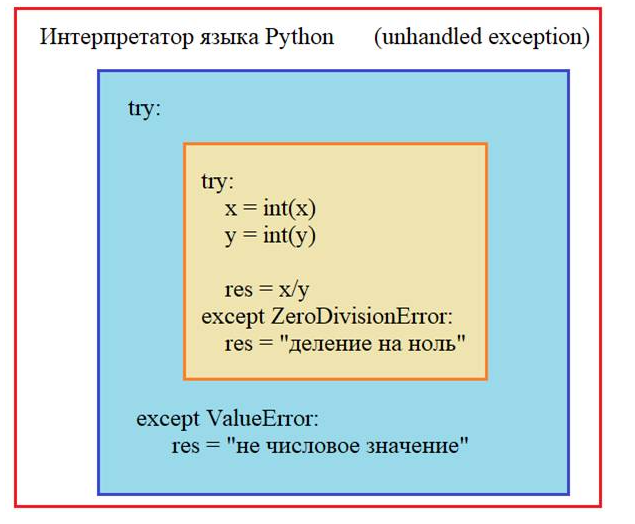

Конструкция try..except имеет следующее формальное определение:

In [ ]:
try:
    инструкции
except [Тип_исключения]:
    инструкции

Весь основной код, в котором потенциально может возникнуть исключение, помещается после ключевого слова try. Если в этом коде генерируется исключение, то работа кода в блоке try прерывается, и выполнение переходит в блок except.

После ключевого слова except опционально можно указать, какое исключение будет обрабатываться (например, ValueError или KeyError). После слова except на следующей стоке идут инструкции блока except, выполняемые при возникновении исключения.

Рассмотрим обработку исключения на примере преобразовании строки в число:

In [2]:
try:
    number = int(input("Введите число: "))
    print("Введенное число:", number)
except:
    print("Преобразование прошло неудачно")

print("Завершение программы")

Введите число: e
Преобразование прошло неудачно
Завершение программы


In [3]:
try:
    print("Введенное число:", number2)
except:
    print("Преобразование прошло неудачно")
print("Завершение программы")

Преобразование прошло неудачно
Завершение программы


###Блок finally

При обработке исключений также можно использовать необязательный блок finally. Отличительной особенностью этого блока является то, что он выполняется вне зависимости, было ли сгенерировано исключение:

In [ ]:
try:
    number = int(input("Введите число: "))
    print("Введенное число:", number)
except:
    print("Преобразование прошло неудачно")
finally:
    print("Блок try завершил выполнение")
print("Завершение программы")

Введите число: 5
Введенное число: 5
Блок try завершил выполнение
Завершение программы


Как правило, блок finally применяется для освобождения используемых ресурсов, например, для закрытия файлов.

###Встроенные типы исключений

В примере выше обрабатывались сразу все исключения, которые могут возникнуть в коде. Однако мы можем конкретизировать тип обрабатываемого исключения, указав его после слова except:

In [ ]:
number = int(input("Введите число: "))

Введите число: r


ValueError: ignored

In [ ]:
try:
    number = int(input("Введите число: "))
    #number3 = number3 + 1
    print("Введенное число:", number)
except ValueError:
    print("Преобразование прошло неудачно")
except NameError:
    print("Не существует имя переменной")
finally:
  print("Завершение программы")

Введите число: 1
Введенное число: 1
Завершение программы


В данном случае блок execpt обрабатывает только исключения типа ValueError, которые могут возникнут при неудачном преобразовании строки в число.

В Python есть следующие базовые типы исключений:

**BaseException**: базовый тип для всех встроенных исключений

**Exception**: базовый тип, который обычно применяется для создания своих типов исключений

**ArithmeticError**: базовый тип для исключений, связанных с арифметическими операциями (OverflowError, ZeroDivisionError, FloatingPointError).

**BufferError**: тип исключения, которое возникает при невозможности выполнить операцию с буффером

**LookupError**: базовый тип для исключений, которое возникают при обращении в коллекциях по некорректному ключу или индексу (например, IndexError, KeyError)

От этих классов наследуются все конкретные типы исключений. В Python обладает довольно большим списком встроенных исключений. Весь этот список можно посмотреть в документации. Перечислю только некоторые наиболее часто встречающиеся:

**IndexError**: исключение возникает, если индекс при обращении к элементу коллекции находится вне допустимого диапазона

**KeyError**: возникает, если в словаре отсутствует ключ, по которому происходит обращение к элементу словаря.

**OverflowError**: возникает, если результат арифметической операции не может быть представлен текущим числовым типом (обычно типом float).

**RecursionError**: возникает, если превышена допустимая глубина рекурсии.

**TypeError**: возникает, если операция или функция применяется к значению недопустимого типа.

**ValueError**: возникает, если операция или функция получают объект корректного типа с некорректным значением.

**ZeroDivisionError**: возникает при делении на ноль.

**NotImplementedError**: тип исключения для указания, что какие-то методы класса не реализованы

**ModuleNotFoundError**: возникает при при невозможности найти модуль при его импорте директивой import

**OSError**: тип исключений, которые генерируются при возникновении ошибок системы (например, невозможно найти файл, память диска заполнена и т.д.)

И если ситуация такова, что в программе могут быть сгенерированы различные типы исключений, то мы можем их обработать по отдельности, используя дополнительные выражения except. И при возникновении исключения Python будет искать нужный блок except, который обрабатывает данный тип исключения:

In [ ]:
try:
    number1 = int(input("Введите первое число: "))
    number2 = int(input("Введите второе число: "))
    print("Результат деления:", number1/number2)
except ValueError:
    print("Преобразование прошло неудачно")
except ZeroDivisionError:
    print("Попытка деления числа на ноль")
except BaseException:
    print("Общее исключение")
print("Завершение программы")

Введите первое число: 1
Введите второе число: 0
Попытка деления числа на ноль
Завершение программы


Если возникнет исключение в результате преобразования строки в число, то оно будет обработано блоком except ValueError. Если же второе число будет равно нулю, то есть будет деление на ноль, тогда возникнет исключение ZeroDivisionError, и оно будет обработано блоком except ZeroDivisionError.

Тип BaseException представляет общее исключение, под которое попадают все исключительные ситуации. Поэтому в данном случае любое исключение, которое не представляет тип ValueError или ZeroDivisionError, будет обработано в блоке except BaseException:.

Однако, если в программе возникает исключение типа, для которого нет соответствующего блока except, то программа не сможет найти соответствующий блок except и сгенерирует исключение. Например, в следующем случае:

In [ ]:
try:
    number1 = int(input("Введите первое число: "))
    number2 = int(input("Введите второе число: "))
    print("Результат деления:", number1/number2)
except ZeroDivisionError:
    print("Попытка деления числа на ноль")
print("Завершение программы")

Введите первое число: 1
Введите второе число: l


ValueError: ignored

Здесь предусмотрена обработка деления на ноль с помощью блока except ZeroDivisionError. Однако если пользователь вместо числа введет некорвертиуремую в число в строку, то возникнет исключение типа ValueError, для которого нет соответствующего блока except. И поэтому программа аварийно завершит свое выполнение.

Python позволяет в одном блоке except обрабатывать сразу несколько типов исключений. В этом случае все типы исключения передаются в скобках:

In [ ]:
try:
    number1 = int(input("Введите первое число: "))
    number2 = int(input("Введите второе число: "))
    print("Результат деления:", number1/number2)
except (ZeroDivisionError, ValueError):    #  обработка двух типов исключений - ZeroDivisionError и ValueError
    print("Попытка деления числа на ноль или некорректный ввод")

print("Завершение программы")

Введите первое число: 1 0
Попытка деления числа на ноль или некорректный ввод
Завершение программы


###Получение информации об исключении

С помощью оператора as мы можем передать всю информацию об исключении в переменную, которую затем можно использовать в блоке except:

In [4]:
try:
    number = int(input("Введите число: "))
    print("Введенное число:", number)
except ValueError as e:
    print("Сведения об исключении", e)
print("Завершение программы")
a = 5+1
print(a)

Введите число: e
Сведения об исключении invalid literal for int() with base 10: 'e'
Завершение программы
6


###Генерация исключений и оператор raise

Иногда возникает необходимость вручную сгенерировать то или иное исключение. Для этого применяется оператор raise. Например, сгенерируем исключение

In [ ]:
try:
    number1 = int(input("Введите первое число: "))
    number2 = int(input("Введите второе число: "))
    if number2 == 0:
        raise Exception("Второе число не должно быть равно 0")
    print("Результат деления двух чисел:", number1/number2)
except ValueError:
    print("Введены некорректные данные")
except Exception as e:
    print(e)
print("Завершение программы")

Введите первое число: 0
Введите второе число: 0
Второе число не должно быть равно 0
Завершение программы


Оператору raise передается объект BaseException - в данном случае объект Exception. В конструктор этого типа можно ему передать сообщение, которое затем можно вывести пользователю. В итоге, если number2 будет равно 0, то сработает оператор raise, который сгенерирует исключение. В итоге управление программой перейдет к блоку except, который обрабатывает исключения типа Exception:

##Функциональный стиль в Python

В функциональном программировании вычисления выполняются путем объединения функций, которые принимают аргументы и возвращают конкретное значение (или значения). Эти функции не изменяют свои входные аргументы и не изменяют состояние программы. Они просто предоставляют результат данного вычисления. Такие функции обычно называются чистыми функциями (pure functions).

Функциональное программирование обычно использует списки, массивы и другие итерационные объекты для представления данных вместе с набором функций, которые работают с этими данными и преобразовывают их. Когда дело доходит до обработки данных в функциональном стиле, обычно используются как минимум три метода:

1. Сопоставление (Mapping) заключается в применении функции преобразования к итерируемому объекту для создания нового объекта. Элементы в новой итерации создаются путем вызова функции преобразования для каждого элемента в исходной итерации.
2. Фильтрация (Filtering) состоит из применения предиката или булевозначной функции (predicate or Boolean-valued function) к итерируемому объекту для создания нового итерируемого объекта. Элементы в новой итерации создаются путем фильтрации любых элементов в исходной итерации, которые заставляют функцию предиката возвращать false.
3. Сокращение (Reducing) состоит из применения функции reduce к итерируемому объекту для получения единственного накопленного значения.


В настоящее время  map(), filter() и reduce() являются фундаментальными компонентами стиля функционального программирования в Python.

* Функция map()
* Функция  filter()
* Функция  reduce()

### map()

Иногда вы можете столкнуться с ситуациями, когда вам нужно выполнить одну и ту же операцию со всеми элементами массива, чтобы создать новый массив. Самый быстрый и распространенный подход к этой проблеме — использовать цикл for в Python. Однако вы также можете решить эту проблему без явного использования циклов, используя map().

map() перебирает элементы итерируемого массива (или коллекции) и возвращает новый массив (или итерируемый объект), который является результатом применения функции преобразования к каждому элементу исходного итерабельного массива.

Согласно документации, map() принимает функцию и итерацию (или несколько итераций) в качестве аргументов и возвращает итератор, который выдает преобразованные элементы по запросу.

Предположим, что вам нужно взять список числовых значений и преобразовать его в список, содержащий квадратное значение каждого числа в исходном списке. В этом случае вы можете использовать цикл for и написать что-то вроде этого:

In [ ]:
numbers = [1, 2, 3, 4, 5]
squared = []
for num in numbers:
  squared.append(num ** 2)
squared

[1, 4, 9, 16, 25]

Когда вы запускаете этот цикл для чисел, вы получаете список квадратных значений. Цикл for перебирает числа и применяет к каждому значению операцию возведения в квадрат. Наконец, он сохраняет полученные значения в squared.

Вы можете добиться того же результата без использования явного цикла for, используя map().

In [8]:
def square(number):
  return number ** 2

numbers = [1, 2, 3, 4, 5]
squared = map(square, numbers)
list(squared)
#list(squared)

[1, 4, 9, 16, 25]

In [ ]:
map(square,numbers)

Вызов map() применяет square() ко всем значениям и возвращает итератор, который возвращает квадратные значения. Затем вызывается list() для map(), чтобы создать объект списка, содержащий квадратные значения.

Поскольку map() написан на C и сильно оптимизирован, его внутренний подразумеваемый цикл может быть более эффективным, чем обычный цикл for в Python. Это одно из преимуществ использования map().

Примеры:

In [12]:
str_nums = ["4", "8", "6", "5", "3", "2", "8", "9", "2", "5"]
int_nums = map(int, str_nums)
list(int_nums)

[4, 8, 6, 5, 3, 2, 8, 9, 2, 5]

In [ ]:
numbers = [-2, -1, 0, 1, 2]
abs_values = list(map(abs, numbers))
print(abs_values)

print(list(map(float, numbers)))

words = ["Welcome", "to", "Real", "Python"]
print(list(map(len, words)))

[2, 1, 0, 1, 2]
[-2.0, -1.0, 0.0, 1.0, 2.0]
[7, 2, 4, 6]


Вы можете использовать любую встроенную функцию с map() при условии, что функция принимает аргумент и возвращает значение.

In [ ]:
def foo(x1,x2,x3):
  return x1*x2*x3
first_it = [1, 2, 3]
second_it = [4, 5, 6, 7]
list(map(foo, first_it, second_it, second_it))

[16, 50, 108]

##Lambda

Когда дело доходит до использования map(), вы обычно видите использование лямбда-функции в качестве первого аргумента. лямбда-функции удобны, когда вам нужно передать функцию на основе выражений в map(). Например, вы можете повторно реализовать пример квадратных значений с помощью лямбда-функции следующим образом:

![g](https://0xbharath.github.io/art-of-packet-crafting-with-scapy/img/lambda.png)

In [ ]:
def square(number):
  return number ** 2
numbers = [1, 2, 3, 4, 5]
print((lambda number: number ** 2)(2))
func = lambda number: number ** 2
print(func(2))

4
4


In [ ]:
numbers = [1, 2, 3, 4, 5]
squared = map(lambda num: num ** 2, numbers)
list(squared)

[1, 4, 9, 16, 25]

In [ ]:
squared

лямбда-функции весьма полезны, когда дело доходит до использования map(). Они могут играть роль первого аргумента map(). Вы можете использовать лямбда-функции вместе с map () для быстрой обработки и преобразования ваших итераций.

In [ ]:
list(map(lambda x, y: x - y, [2, 4, 6], [1, 3, 5]))

[1, 1, 1]

In [ ]:
list(map(lambda x, y, z: x + y + z, [2, 4], [1, 3], [7, 8]))

[10, 15]

In [ ]:
def func (x):
    return x**10
func(5)

9765625

In [ ]:
l_func = lambda x: x**10
l_func(5)

9765625

In [ ]:
numbers = [1,2,3]
arr=[]
for element in numbers:
  arr.append(element*2)
print(arr)

print([element*2 for element in numbers if element>2])


[2, 4, 6]
[6]


## Итераторы

Итерируемый объект — это что-то, что можно итерировать.
Итератор — это сущность порождаемая функцией iter, с помощью которой происходит итерирование итерируемого объекта.


Итератор не имеет индексов и может быть использован только один раз.


1. Чтобы получить итератор мы должны передать функции iter итерируемый объект.
2. Далее мы передаём итератор функции next.
3. Когда элементы в итераторе закончились, порождается исключение StopIteration.

In [13]:
a=[1,2,3]
type(a)

list

In [16]:
iter(a)

In [20]:
numbers = [1, 2, 3, 4, 5]
squared = map(lambda num: num ** 2, numbers)
type(squared)

map

In [18]:
list(squared)

[1, 4, 9, 16, 25]

Это итератор

In [25]:
next(squared)

25

In [24]:
next(squared)

16

In [26]:
next(squared)

StopIteration: ignored

Объекты, элементы которых можно перебирать в цикле for, содержат в себе объект итератор, для того, чтобы его получить необходимо использовать функцию iter(), а для извлечения следующего элемента из итератора – функцию next().

In [ ]:
num_list = [1, 2, 3, 4, 5]
itr = iter(num_list)
print(next(itr))
print(next(itr))
print(next(itr))
print(next(itr))
print(next(itr))
print(next(itr))

1
2
3
4
5


StopIteration: ignored

Как видно из приведенного выше примера вызов функции next(itr) каждый раз возвращает следующий элемент из списка, а когда эти элементы заканчиваются, генерируется исключение StopIteration.

## Генераторы

Генератор – это функция, которая будучи вызванной в функции next() возвращает следующий объект согласно алгоритму ее работы. Вместо ключевого слова return в генераторе используется yield. Проще всего работу генератор посмотреть на примере. Напишем функцию, которая генерирует необходимое нам количество единиц.

In [ ]:
gen_iter

<generator object simple_generator at 0x7ff14c294d60>

In [29]:
def simple_generator(val):
  for i in range(val):
      val -= 1
      yield val
g = simple_generator(5)
print(next(g))
print(next(g))

4
3


In [31]:
gen_iter=iter([1,2])
print(next(gen_iter))
print(next(gen_iter))

1
2


In [ ]:
def simple_generator(val):
   while val > 0:
       val -= 1
       yield val

gen_iter = simple_generator(5)
print(next(gen_iter))
print(next(gen_iter))
print(next(gen_iter))
print(next(gen_iter))
print(next(gen_iter))
print(next(gen_iter))

4
3
2
1
0


StopIteration: ignored

Ключевым моментом для понимания работы генераторов является то, при вызове yield функция не прекращает свою работу, а “замораживается” до очередной итерации, запускаемой функцией next().

In [ ]:
def foo(x):
  while x>0:
    x=x+1
    yield x

gen_iter = foo(1)
print(next(gen_iter))
print(next(gen_iter))
print(next(gen_iter))
print(next(gen_iter))
print(next(gen_iter))
print(next(gen_iter))

2
3
4
5
6
7


###`enumerate()`

Представим себе такую задачу: у нас есть список студентов, и хотим выводить на экран порядковый номер студента в списке и его имя.

In [ ]:
students

['Веня', 'Сеня', 'Каролина', 'Сабрина']

Как этого добиться, используя уже знакомые способы? Можно подключить к решению этой задачи функцию `range()`и задать интервал от 0 до числа элементов в списке (как мы помним, правый конец исключается):

In [ ]:
for i in range(0, len(students)):
    print(i, students[i])

0 Веня
1 Сеня
2 Каролина
3 Сабрина


Но, как всегда, есть готовый и более удобный способ – функция `enumerate()`. Эта функция создает пары *индекс элемента-значение элемента*:

In [ ]:
list(enumerate(students))

[(0, 'Веня'), (1, 'Сеня'), (2, 'Каролина'), (3, 'Сабрина')]

Поэтому работать в ней можно так же, как с методом `.items()` у словарей. Например, так:

In [ ]:
for i, v in enumerate(students):
    print(i, v)

0 Веня
1 Сеня
2 Каролина
3 Сабрина


Здесь `i` – индекс элемента в списке, `v` – его значение. И опять же, неважно, как называть эти переменные: Python знает, что если после перечисления переменных в `for`, то первая переменная отвечает за индекс, а вторая – за значение.

##Модули стандартной библиотеки

https://losst.ru/standartnye-biblioteki-python

###`Itertools()`

Модуль itertools стандартизирует основной набор быстрых эффективных по памяти инструментов, которые полезны сами по себе или в связке с другими инструментами. Вместе они формируют «алгебру итераторов», которая позволяет лаконично и эффективно создавать специализированные инструменты на чистом Python.

Модуль itertools находится в стандартной библиотеке Python.

Модуль представляет следующие типы итераторов:

* Бесконечные итераторы;

* Конечные итераторы;

* Комбинаторные генераторы.

https://all-python.ru/osnovy/itertools.html

In [ ]:
import itertools

###random()

In [ ]:
import random

In [ ]:
random.random()                             # Random float:  0.0 <= x < 1.0

0.8554990020780824

In [ ]:
random.uniform(2.5, 10.0)                   # Random float:  2.5 <= x <= 10.0

6.993863014097031

In [ ]:
random.expovariate(1 / 5)                   # Interval between arrivals averaging 5 seconds

9.794751542789367

In [ ]:
random.randrange(10)                        # Integer from 0 to 9 inclusive

0

In [ ]:
random.randrange(0, 101, 2)                 # Even integer from 0 to 100 inclusive

58

In [ ]:
random.choice(['win', 'lose', 'draw'])      # Single random element from a sequence

'draw'

In [ ]:
deck = 'ace two three four'.split()
random.shuffle(deck)                        # Shuffle a list

In [ ]:
random.sample([10, 20, 30, 40, 50], k=4)    # Four samples without replacement

[40, 30, 50, 20]

## Регулярные выражения




**Регулярные выражения** _\(regular expressions, RegExp\)_ —  это формальный язык для операций \(поиск, замена и т.п.\) с подстроками в тексте. Иными словами, это способ задать некоторый паттерн и найти / заменить на что-либо те кусочки текста, которые с ним совпадают.

###### Выбор и группировка символов

* **.** — любой символ
* **\|** — _или_ все то, что слева, _или_ то, что справа
* **\(\)** — группировка символов \(если сомневаетесь, ставить их или нет, то лучше поставить :\)

Часть регулярки, заключенная в скобки, называется **группой**. Группы нумеруются по открывающей скобке.   

![](/img/reg5.png)

* **\1** — группа с соответствующим номером \(используется при замене\)
* **\[ \]** — любой единичный символ из заключенных в скобки
* **\[^ \]** — любой единичный символ кроме заключенных в скобки

**NB!** Внутри \[ \] не работают _операторы_ __.__ __\\__ __\*__ __+__ и т.д.

###### Количественные операторы \(квантификаторы\)

* **?** — предыдущий символ/группа может быть, а может не быть
* **+** — предыдущий символ/группа может повторяться 1 и более раз
* **\*** — предыдущий символ/группа может повторяться 0 и более раз
* **{n,m}** — предыдущий символ/группа может повторяться от от n до m включительно
* **{n,}** — предыдущий символ/группа в скобках может повторяться n и более раз
* **{,m**} — предыдущий символ/группа может повторяться до m раз
* **{n}** — предыдущий символ/группа повторяется n раз

###### Классы \(диапазоны\) символов

* **\[A-Z\]** — _один любой_ символ верхнего регистра \(латиница\)
* **\[a-z\]** — любой символ нижнего регистра \(латиница\)
* **\[А-Я\]** — любой символ верхнего регистра \(кириллица\)
* **\[а-я\]** — любой символ нижнего регистра \(кириллица\)
* **\[0-9\]** или **\d** — цифра
* **\[^0-9\]** или **\D** — любой символ, кроме цифры

Можно комбинировать:

* **\[A-Za-z\]** — любой символ верхнего и нижнего регистра \(латиница\)
* **\[A-Za-z0-9\]** — любой символ верхнего и нижнего регистра \(латиница\) и цифры
* **\[A-Za-z0-9\_\]** или **\w** — любой символ верхнего и нижнего регистра \(латиница\), цифры и \_
* **\[^A-Za-z0-9\_\]** или **\W** — все, кроме символов верхнего и нижнего регистра \(латиница\), цифр и \_
* Можно выбрать нужный диапазон из [юникодной таблицы](https://unicode-table.com/ru/) самостоятельно — например, **[à-ÿ]**

Служебные символы:

* **\t** — табуляция
* **\s** — любой пробельный символ
* **\S** — все, кроме пробелов
* **\n** \(или **\r\n** на Windows\) — перенос строки
* **^** — начало строки
* **$** — конец строки


###### "Жадные" и "ленивые" операторы

Квантификаторы по умолчанию ведут себя жадно: это значит, что они стремятся "съесть" как можно больше символов и из всех возможных вариантов они поймают наиболее длинную строку. Например, мы хотим найти в строке _кот выпил компот_ слова "кот" и "компот" и пишем такое выражение: **к.\*от** \(читается как "к, любой символ в количестве от 0 до бесконечности, от"\), где __.\*__ — любое количество любых символов. Однако такое выражение выдаст даст следующий результат:

![](/img/reg6.png)

Максимальное количество символов между "к" и "от" в этой строке — 13, _"от выпил компо"_, и наш жадный оператор поймал именно его. Чтобы найти более короткие совпадения, т.е. отдельно "кот" и "компот", нужно превратить **жадный оператор** в **ленивый**, поставив после него знак "?". Это работает со всеми квантификаторами.

![](/img/reg7.png)

| Жадные квантификаторы | Ленивые квантификаторы |
| :--- | :--- |
| \* | \*? |
| + | +? |
| ? | ?? |
| {min, max} | {min, max}? |

######

###### Экранирование служебных символов

Вы уже заметили, что как и любой язык, регулярные выражения записываются с помощью особого алфавита - точек, звездочек, скобочек и т.д. Но что делать, если нужно найти служебные символы вроде + или \* в тексте? Все просто: нужно **экранировать** их, т.е. поставить перед ними __\\__. В этом примере мы экранируем \*, чтобы сделать ее из служебного символа текстовым, а вот + так и остался служебным и означает "один и более раз".



Для работы с регулярными выражениями в питоне есть встроенная библиотека `re` (документацию можно почитать [вот здесь](https://docs.python.org/3/library/re.html)). Для работы нужно сначала ее импортировать, как и любую другую библиотеку. Рассмотрим наиболее часто используемые методы:

* re.match()
* re.search()
* re.findall()
* re.sub()
* re.compile()

![](/img/reg9.png)



### re.match()

Этот метод ищет по заданному шаблону **только** в начале строки. Например, если мы вызовем метод `match()` на строке "the cat is on the mat" с шаблоном "the", то он найдет первое "the" в строке и завершится успешно. Однако если поискать "cat", то результат будет отрицательный. У этого метода два аргумента:

* что найти (шаблон)
* где найти (строка)

In [ ]:
import re

re.match('the', 'the cat is on the mat')

<_sre.SRE_Match object; span=(0, 3), match='the'>


In [ ]:
print(re.match('cat', 'the cat is on the mat'))

None


### re.search()

Этот метод, в отличие от предыдущего, ищет заданный шаблон в **любом** месте строки, но возвращает только первое найденное совпадение. Аргументы те же.

In [ ]:
re.search('the', 'the cat is on the mat')

<_sre.SRE_Match object; span=(0, 3), match='the'>

In [ ]:
re.search('cat', 'the cat is on the mat')

<_sre.SRE_Match object; span=(4, 7), match='cat'>

А как вывести не объект, а саму строку, которая нашлась по шаблону? Для естьго есть метод `group()`, который в качестве аргумента принимает номер группы. В случае `match()` и `search()` возвращается только одна группа под номером 0. Здесь, как и в случае с индексами, нумерация начинается с 0.

In [ ]:
re.search('cat', 'the cat is on the mat').group(0)

'cat'

### re.findall()

Этот метод возвращает список **всех** найденных совпадений в любом месте строки. Аргументы у него те же,  что и у предыдущих двух методов, а возвращает он список совпадений.

In [ ]:
re.findall('the', 'the cat is on the mat')

['the', 'the']

In [ ]:
re.findall('the', 'the cat is on the mat')[1]

'the'

### re.sub()

Этот метод ищет шаблон в строке и заменяет его на указанную подстрок. Если шаблон не найден, строка остается неизменной. Соответствено, в отличие от предыдущих методов, у него 3 аргумента:
* что заменить
* на что заменить
* где заменить

Заменяются все подстроки, которые нашлись по шаблону.

In [ ]:
re.sub('the', 'my', 'the cat is on the mat')

'my cat is on my mat'

###  re.compile()

Мы можем собрать регулярное выражение в отдельный объект. Это полезно, когда нам нужно много раз использовать один и тот же паттерн: во-первых, не придется каждый раз переписывать одну и ту же регулярку, а во вторых, так программа будет гораздо быстрее!

In [ ]:
# компилируем регулярку для поиска котиков
cats = re.compile('cat')

# а теперь можно использовать эту переменную вместо re с любым из методов
# но во всех будет на один аргумент ("что искать/заменять") меньше
print(cats.search('the cat is on the mat').group(0))
print(cats.findall('my cat is black, my cat is fat, my cat likes rats, rats are gray and fat'))
print(cats.sub('dog', 'the cat is on the mat'))

cat
['cat', 'cat', 'cat']
the dog is on the mat


In [ ]:
# это для выравнивания таблицы, не обращайте внимания

%%html
<style>
table {float:left}
</style>

Еще раз о синтаксисе регулярных выражений

Символ|Значение
------|--------
.	| Один любой символ, кроме новой строки \n.
?	| 0 или 1 вхождение шаблона слева
+	| 1 и более вхождений шаблона слева
\*	| 0 и более вхождений шаблона слева
\w	| Любая цифра или буква (\W — все, кроме буквы или цифры)
\d	| Любая цифра [0-9] (\D — все, кроме цифры)
\s	| Любой пробельный символ (\S — любой непробельнй символ)
\b	| Граница слова
[..]| Один из символов в скобках ([^..] — любой символ, кроме тех, что в скобках)
\	|Экранирование специальных символов (\. означает точку или \+ — знак «плюс»)
^ и $ |	Начало и конец строки соответственно
{n,m}| От n до m вхождений ({,m} — от 0 до m)
a&#124;b |Соответствует a или b
()	| Группирует выражение и возвращает найденный текст
\t, \n, \r	| Символ табуляции, новой строки и возврата каретки соответственно

#Задачи для решения на семинре



1. Турист собирается в поход. Он сможет нести N (аргумент функции) кг вещей. Но вещей, которые он запланировал уложить в рюкзак, оказалось намного больше. Нужно определить, какие вещи от наиболее тяжелых к самым легким поместятся в рюкзак.

Использовать lambda

In [1]:
things = {'компас': 100, 'фрукты': 500, 'рубашка': 300,
      	'термос': 1000, 'аптечка': 200, 'куртка': 600, 
          'бинокль': 400, 'удочка': 1200, 'салфетки': 40, 
          'бутерброды': 820, 'палатка': 5500, 'спальный мешок': 2250, 'учебник по программированию на Python': 300}

2. Возвести все числа в списке в квадрат [-1, 7, -9, -11]

Использовать map

3. Напишите программу, которая вычисляет "стоимость" введенного пользователем слова. Будем считать, что на вход подается только одно слово, которое содержит либо только английские, либо только русские буквы.

**Использовать регулярные выражения для проверки являются ли введенные буквы русскимим или английскими**

In [2]:
#стоимость букв
points_en = {1:'AEIOULNSTR',
      	2:'DG',
      	3:'BCMP',
      	4:'FHVWY',
      	5:'K',
      	8:'JZ',
      	10:'QZ'}
points_ru = {1:'АВЕИНОРСТ',
      	2:'ДКЛМПУ',
      	3:'БГЁЬЯ',
      	4:'ЙЫ',
      	5:'ЖЗХЦЧ',
      	8:'ШЭЮ',
      	10:'ФЩЪ'}

4. Найти все 4-х значные числа в стоке '1234 aaaaa 56 bbbbbb 4567 cccc 888 6768hhhh